====== BEFORE PREPROCESSING ======
Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany    

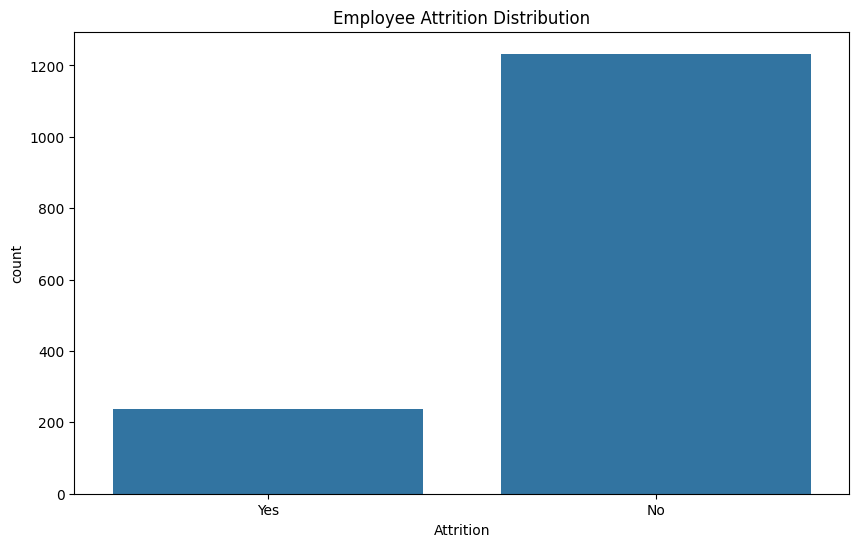

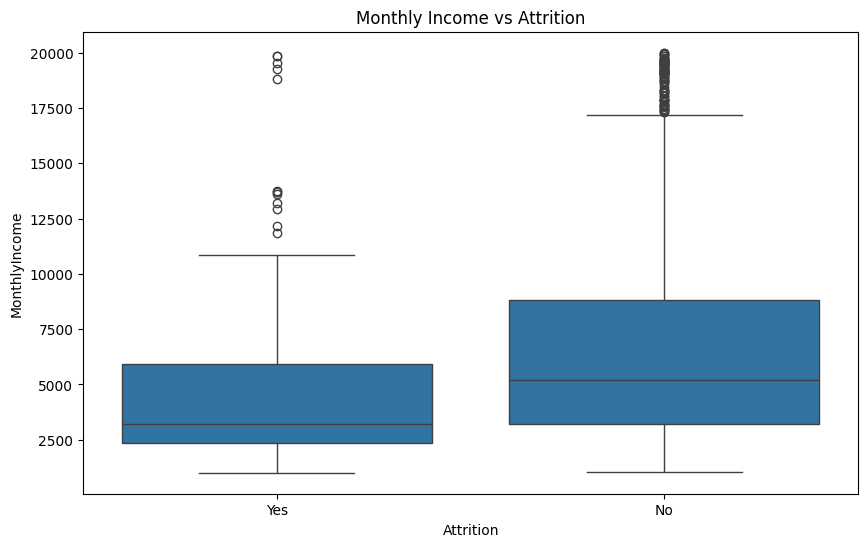

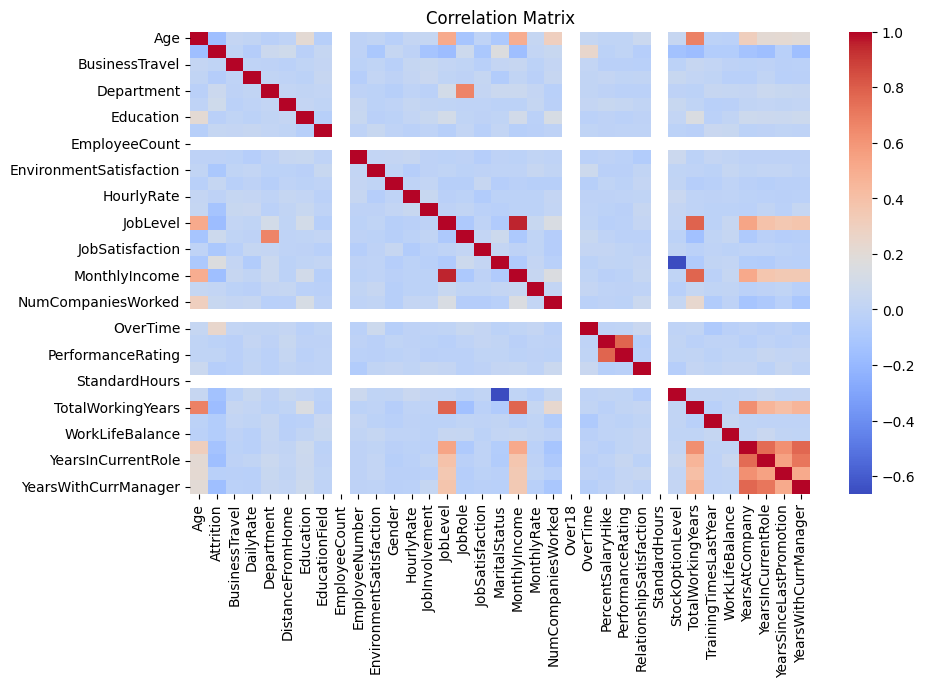


========= Attrition Prediction Results =========

LogisticRegression Accuracy: 0.8639
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       255
           1       0.46      0.15      0.23        39

    accuracy                           0.86       294
   macro avg       0.67      0.56      0.58       294
weighted avg       0.83      0.86      0.83       294


DecisionTree Accuracy: 0.7823
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       255
           1       0.25      0.33      0.29        39

    accuracy                           0.78       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.81      0.78      0.79       294


RandomForest Accuracy: 0.8401
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       255
           1       0.25      0.10      0.15        39

    accuracy                     

In [4]:
# =========================
# 1. Imports and Data Load
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load dataset
df = pd.read_csv("C:/Users/Administrator/Employee-Attrition.csv")

# ==============================
# 2. Preprocessing Report (Before)
# ==============================
print("====== BEFORE PREPROCESSING ======")
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nUnique values in categorical columns:")
print(df.select_dtypes(include='object').nunique())

# ======================
# 3. Data Preprocessing
# ======================
df_clean = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = df_clean.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Drop duplicates
df_clean.drop_duplicates(inplace=True)

# Fill missing values
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Do NOT scale target variables
target_columns = ['Attrition', 'PerformanceRating']
features_to_scale = df_clean.select_dtypes(include=np.number).columns.difference(target_columns)

scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

# Make sure target variables are integers
df_clean['Attrition'] = df_clean['Attrition'].astype(int)
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].astype(int)

# ==============================
# Preprocessing Report (After)
# ==============================
print("\n====== AFTER PREPROCESSING ======")
print("Missing Values:\n", df_clean.isnull().sum())
print("\nData Types:\n", df_clean.dtypes)

# ====================
# 4. Exploratory Data Analysis (EDA)
# ====================
plt.figure(figsize=(10,6))
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# ===================================================
# 5. Model 1: Employee Attrition Prediction (Binary)
# ===================================================
features_attrition = ['Age', 'Department', 'MonthlyIncome', 'JobSatisfaction',
                      'YearsAtCompany', 'MaritalStatus', 'OverTime']
target_attrition = 'Attrition'

X_attr = df_clean[features_attrition]
y_attr = df_clean[target_attrition]

X_train, X_test, y_train, y_test = train_test_split(X_attr, y_attr, test_size=0.2, random_state=42)

# Try Logistic Regression and Decision Tree
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

best_model_attr = None
best_score = 0

print("\n========= Attrition Prediction Results =========")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    if acc > best_score:
        best_score = acc
        best_model_attr = model

# Save best model
with open("C:/Users/Administrator/best_attrition_model.pkl", "wb") as f:
    pickle.dump(best_model_attr, f)

print("Saved best attrition model as 'best_attrition_model.pkl'")

# ==========================================================
# 6. Model 2: Performance Rating Prediction (Multiclass)
# ==========================================================
features_perf = ['Education', 'JobInvolvement', 'JobLevel', 'MonthlyIncome',
                 'YearsAtCompany', 'YearsInCurrentRole']
target_perf = 'PerformanceRating'

X_perf = df_clean[features_perf]
y_perf = df_clean[target_perf]

X_train, X_test, y_train, y_test = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

# Try RandomForestClassifier
model_perf = RandomForestClassifier()
model_perf.fit(X_train, y_train)
y_pred = model_perf.predict(X_test)

print("\n========= Performance Rating Prediction =========")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save model
with open("C:/Users/Administrator/best_performance_model.pkl", "wb") as f:
    pickle.dump(model_perf, f)

print("Saved performance rating model as 'best_performance_model.pkl'")
